В этом уроке, посвященно корреляционнному анализу, вы изучите способы оценки связи между признаками.

После изучения этого урока вы будете знать:
*  соотношение понятий "зависимость" и "коррелированность";
*  что такое коэффициент корреляции Пирсона и каковы его свойства;
*  что такое множественный и частный коэффициент корреляции;
*  что такое ложная корреляция;
*  что такое ранговая корреляция, коэффициенты корреляции Кендалла и Спирмена.

В этом уроке используйте файл используйте excel файл с данными, доступный по сылке

https://drive.google.com/file/d/1XJHELLqNpm3ejZxFJ7SpDV-wHARdX5j8/view?usp=sharing


#Теоретический блок

В этом уроке мы будем интересоваться теми или иными аспектами зависимостей между двумя или большим числом величин. При этом, изучая зависимости между величинами, будем опираться на общую теорию проверки статистических гипотез. 

**Определение**

Предположение о распределении генеральной совокупности или параметрах этого распределение называется статистической гипотезой.

Так как нам предстоит исследовать очень обширную тему, то полезно начать с общего обзора.

Большая часть работ по данной теме возникла в связи с задачей о совместном распределении пары случайных величин; ее можно назвать задачей о статистической зависимости. Существует иная область математики, касающаяся зависимостей строго функционального вида между величинами (как, например, зависимости в матемтической физике). Указанный вид зависимостей тоже представляет статистический интерес, потому что функционально связанные величины подвержены ошибкам наблюдений или измерений. Назовем это задачей о  *функциональной зависимости*. В рамках данного урока будем заниматься только задачей о *статистической зависимости*, в которой величины (кроме вырожденных случаев) не связаны функционально, и кроме того могут быть подвержены ошибкам наблюдений и измерений. Мы будем рассматривать их просто как совокупность случайных величин, подчиненных некоторому совместному распределению. Подробнее о том, как определяется совокупность случайных величин можно прочитать в [Гмурман, гл. 14].

В самой области статистической зависимости полезно провести дальнейшее различие. Нас может интересовать либо *взаимозависимость* между несколькими величинами (не обязательно между всеми), либо *зависимость* одной или большего числа величин от остальных.

Например, можно рассмотреть вопрос, существует ли связь между доходом семьи и расходами на роскошь (дорогие машины, ювелирные украшения и т. п.); при такой постановке это есть задача о взаимозависимости. Но если мы хотим, используя измерения дохода семьи, получить информацию об ожидаемых тратах на роскошь, то мы приходим к задаче о зависимости расходов от доходов. Это пример ситуации, в которой может представлять интерес как взаимозависимость, так и зависимость. С другой стороны, имеются ситуации, в которых интересна только зависимость. Связь между величиной урожая и количеством выпавших осадков представляет собой пример существенной асимметрии. Здесь из внестатических соображений понятно, что дожди влияют на урожай и, совершенно определенно, урожай не воздействует на дожди. Таким образом, мы должны изучать зависимость урожая от дождей.


# Линейная и нелинейная зависимость, корреляция

Пусть даны наблюдения за двумя случайными величинами $X$ и $Y,$ которые мы будем трактовать как цену на нефть в долларах за баррель и доход в бюджет в млн. рублей. Требуется проверить, существует ли статистическая зависимость между этими величинами, и если да, то какая и насколько тесная. Для ответа на этот вопрос используем корреляционный анализ.

**Определение**

Корреляционный анализ - метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными.

In [ ]:
X = [30,  69,  86,  56,  44,  97,  53,  66,  39,  29,  34,  31,  92]
Y = [194, 267, 313, 207, 140, 320, 237, 260, 172, 117, 196, 169, 262]

Исследование стоит начинать с графического изображения данных на плоскости $XOY.$ На рисунке видно, что точки образовали некоторое облако и выстроились вдоль воображаемой наклонной прямой, т. е. подчинены *линейной статистической связи*. Однако данное наблюдение должно быть проверено строго, с привлечением общей теории проверки статистических гипотез.

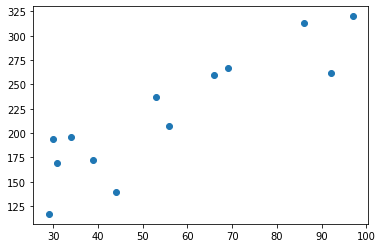

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X, Y)
plt.show()

Для того, чтобы пояснить значение термина "линейный", вспомним общий вид уравнения прямой: $y = kx +b$.

Здесь $y$ - зависимая величина, $x$ - независимая величина, $k$ - угловой коэффициент, $b$ -  свободный член. Содержательный смысл этих величин следующий:
*  если $x=0,$ то $y=b,$ т. е. $b$ --- это начальное смещение;
*  при увеличении $x$ на единицу $y$ увеличивается на $k$ единиц.

Связи между случайными величинами можно разделить на линейные и нелинейные, см. рисунок.

* Линейные статистические связи - это такие статистические связи, которые хорошо описываются линейным уравнением (в частности, в двумерном случае - уравнением прямой, в трехмерном случае - уравнением плоскости). В рассматриваемом примере можно сказать, что точки на плоскости располагаются вдоль прямой.

* Нелинейные статистические связи - это такие статистические связи, которые описываются уравнением прямой плохо или не описываются вовсе. Примером нелинейной связи может служить зависимость скорости роста микроорганизмов в среде от концентрации сахара - сначала рост концентрации сахара способствует увеличению количества микроорганизмов, но с определенного уровня сахар начинает действовать как консервант и останавливает рост микроорганизмов.

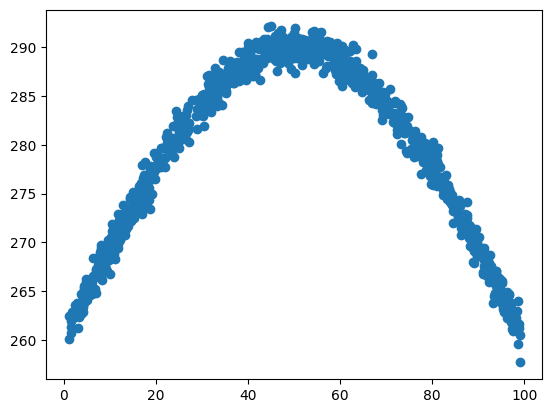

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
#import random as rnd

nonlinX = np.random.uniform(1, 99, 1000)
#nonlinY = - 0.1 * (nonlinX - 50)**2 + 10 * rnd.randn(1000) + 260

nonlinY = 30 * np.sin(nonlinX / 100 * 3.14) + 1 * np.random.randn(1000) + 260
plt.scatter(nonlinX, nonlinY)
plt.show()

In [ ]:
from scipy import stats

corr, pValue = stats.pearsonr(nonlinX, nonlinY)
print(corr, pValue)

-0.04242365566494864 0.1800895427014253


Для анализа нелинейных связей может применяться корреляционное отношение, определяемое через отношение межгрупповой дисперсии к общей
$$\eta^2_{Y|X} = 1-M\left[ \frac{D(Y|X)}{D(Y)}\right],$$
где $D(Y)$ --- дисперсия $Y,$ $D(Y|X)$ --- условная дисперсия $Y$ при данном $X,$ характеризующая рассеяние $Y$ около условного математического ожидания $M(Y|X)$ при данном значении $X.$ Мы в дальнейшем будем анализировать только линейные связи.

**Определение**

Корреляция - это линейная связь между парой случайных величин.

Две случайные величины могут быть связаны
* более тесной линейной связью, соответствующее корреляционное облако будет узкое,
* менее тесной линейной связью, соответствующее корреляционное облако будет широкое.



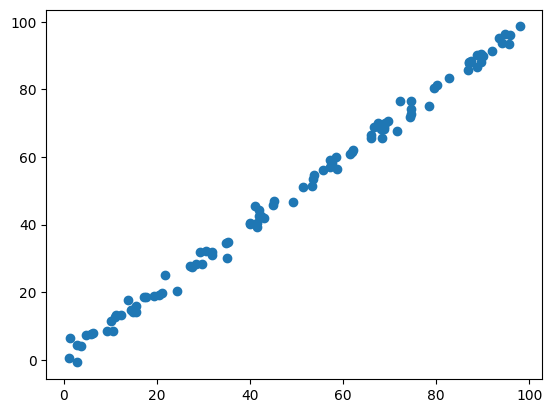

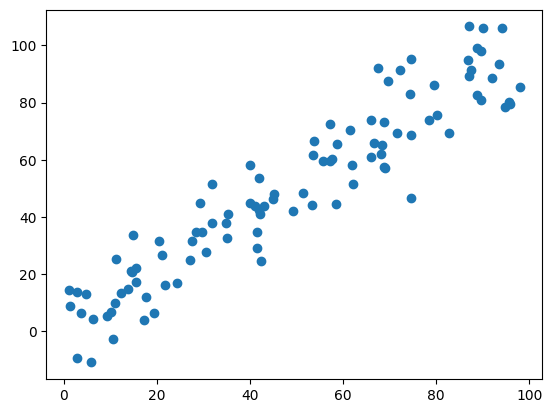

PearsonRResult(statistic=0.998059133428278, pvalue=5.592974213893122e-120)
PearsonRResult(statistic=0.9395060153026764, pvalue=2.1503392907802037e-47)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as rnd

np.random.seed(1)
X = rnd.uniform(1, 99, 100)
Y1 = 1 * X + 2 * rnd.randn(100)
Y2 = 1 * X + 10 * rnd.randn(100)

plt.scatter(X, Y1)
plt.show()
plt.scatter(X, Y2)
plt.show()

print(stats.pearsonr(X, Y1))
print(stats.pearsonr(X, Y2))

Для оценки тесноты линейной связи между парой случайных величин введем понятие коэффициента корреляции.

**Определение**

Коэффициент корреляции - это числовая величина, характеризующая тесноту линейной связи между парой случайных величин.

Здесь рассматривается коэффициент корреляции Пирсона, который находят для пары случайных величин в интервальной шкале. Коэффициенты корреляции Спирмена и Кендалла будут рассмотрены далее.

Коэффициент корреляции случайных величин $X$ и $Y$ обозначают $r_{XY}.$ Найти коэффициент корреляции можно по следующей формуле
$$r_{XY} = \frac{M(XY) - M(X)M(Y)}{\sigma_X\sigma_Y},$$
где $M(X)$ --- математическое ожидание случайной величины $X,$ $\sigma_X$ --- среднее квадратичное отклонение случайной величины $X,$ $M(XY)$ --- математическое ожидание произведения случайной величин $X$ и $Y.$

Перечислим свойства коэффициента корреляции.
* Коэффициент корреляции величина ограниченная, $-1 \leq r_{XY}\leq 1.$
* Если величины связаны строгой функциональной связью, и с увеличением $X$ величина $Y$ также возрастает, то $r_{XY}=1.$ В этом случае точки корреляционного облака идеально ложатся на прямую направленную вверх.
* Если величины связаны строгой функциональной связью, и с увеличением $X$ величина $Y$ убывает, то $r_{XY}=-1.$ В этом случае точки корреляционного облака идеально ложатся на прямую направленную вниз.
* Если $r_{XY} =0,$ то величины некоррелированы. В этом случае точки корреляционного облака вдоль прямой не ложатся и обычно хаотично разбросаны.

Поясним связь между понятиями зависимость и коррелированность. Поскольку коррелированность - это частный случай зависимости (линейная зависимость), то из коррелированности следует зависимость. Обратное неверно: из зависимости не следует коррелированность (см. пример с нелинейной связью).

Часто, желая сделать свою речь более наукообразной и показать свою "образованность", люди допускают ошибку, говоря "это некоррелированные величины", имея в виду то, что величины несвязаны. Обращаем внимание, что зависимость и коррелированность - это не синонимы.


Если величины связаны линейной связью, то коэффициент корреляции показывает только тесноту корреляционного облака, отсутствие "зашумленности", но не показывает наклон прямой. То есть коэффициент корреляции не показывает на сколько изменяется одна величина при изменении другой на единицу. Если такая оценка требуется, то необходимо провести регрессионный анализ. 


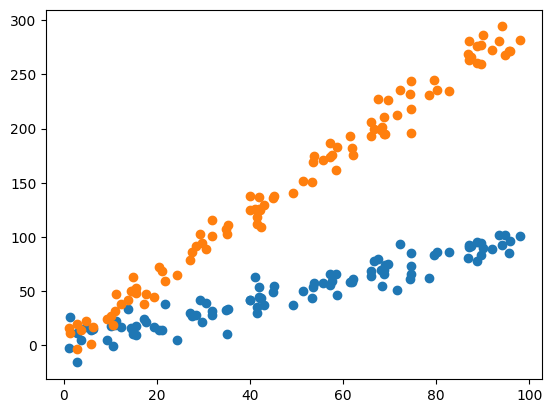

PearsonRResult(statistic=0.9523515031585063, pvalue=2.4419181895820146e-52)
PearsonRResult(statistic=0.992955251214283, pvalue=1.345914603307357e-92)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as rnd

np.random.seed(1)
X = rnd.uniform(1, 99, 100)
Y3 = 1 * X + 10 * rnd.randn(100)
Y4 = 3 * X + 10 * rnd.randn(100)

plt.scatter(X, Y3)
plt.scatter(X, Y4)
plt.show()

print(stats.pearsonr(X, Y3))
print(stats.pearsonr(X, Y4))

# Задача 1

### Постановка задачи

В медицинском центре охраны здоровья проходили обследование 100 рабочих. В файле task2.xlsx приведены данные о систолическом артериальном давлении (мм.рт.ст), идексе массы тела, возрасте (год), стаже (год). Файл доступен по ссылке
https://drive.google.com/file/d/1QPNusG27ii8oj-WgoNgWQ2tvNI3wgMsJ/view?usp=sharing

Столбцы соответственно называются:
* sbp (systolic blood pressure) 
* bmi (body mass index)
* age
* experience

Треубется
*  Исследовать связь между индексом массы тела и систолическим артериальным давлением.
*  Исследовать связь между стажем и систолическим артериальным давлением.


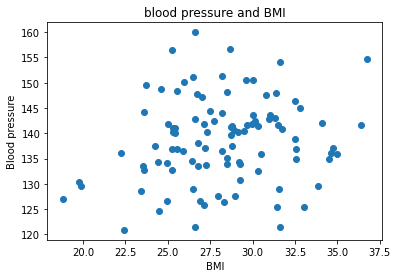

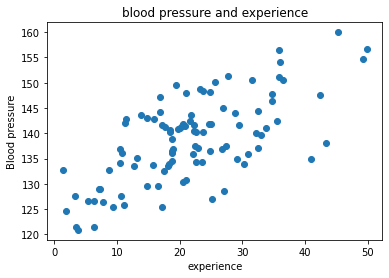

,sbp,bmi,age,experience
count,100.000000,100.000000,100.000000,100.000000
mean,138.638578,28.242331,47.649113,21.667301
std,8.375021,3.558462,9.691511,10.495993
min,120.879681,18.793845,20.947123,1.339974
25%,133.717046,25.544730,43.019929,15.483127
50%,139.338181,28.256296,48.257512,21.000352
75%,143.171947,30.549641,53.532308,27.521661
max,159.990311,36.742302,72.278148,49.869737


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files

files.upload()
!ls
df = pd.read_excel('task2.xlsx', index_col=0)#Data Frame

plt.scatter(df['bmi'], df['sbp'])
plt.title('blood pressure and BMI')
plt.xlabel('BMI')
plt.ylabel('Blood pressure')
plt.show()

plt.scatter(df['experience'], df['sbp'])
plt.title('blood pressure and experience')
plt.xlabel('experience')
plt.ylabel('Blood pressure')
plt.show()

df.describe()

In [ ]:
from scipy import stats

corr, pValue = stats.pearsonr(df['bmi'], df['sbp'])
print(corr, pValue)

corr, pValue = stats.pearsonr(df['experience'], df['sbp'])
print(corr, pValue)
#H0 - величины некоррелированы. pValue < 0.05

0.16647923474756518 0.09783613492772071
0.6807914336140751 6.563603325266749e-15


Поскольку p-value = 0.097, нет оснований отвергнуть нулевую гипотезу о том, что ИМТ не коррелирован с  уровнем систолического АД.

Поскольку p-value = $6.563 \, 10^{-15}$, нулевую гипотезу о том, что стаж не коррелирован с уровнем систолического АД отвергаем как противоречащую экспериментальным данным.

# Задача 2

### Постановка задачи

Рабочие утверждают, что потеряли здоровье на заводе, так как артериальная гипертензия коррелирована (как было показано в предыдущем пункте) со стажем.
Работодатель в свою очередь утверждает, что артериальная гипертензия у стажированных рабочих вызвана их возрастом, а не вредным стажем.

Как проверить, кто прав в этом споре: рабочие или работодатель?

**Определение**

Ложная корреляция - корреляция, которая возникла не в результате прямого соотношения между оцениваемыми переменными, а в результате их связей с третьей переменной (или четвертой, или более); при этом нет никакой связи, объединяющей эти переменные.

Для исключения влияния третьей переменной вычисляют частный коэффициент корреляции при исключенном влиянии третьей.


Нужно найти частный коэффициент корреляции систолического АД и стажа при исключенном влиянии возраста.


In [ ]:
!pip install pingouin
import pingouin as pg

#df = pg.read_dataset('partial_corr')
pg.partial_corr(data=df, x='experience', y='sbp', covar='age')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,-0.043584,"[-0.24, 0.15]",0.0019,-0.01868,0.666782,0.137,0.071409


Поскольку 95% доверительный интервал для частного коэффициента корреляции систолического АД и стажа при исключенном влиянии возраста включает 0, можно считать,  что на данной выборке рабочих связь между уровнем систолического АД и стажем не доказана. (Точнее говоря линейная связь не доказана). Дело в возрасте, а не стаже.

# Задача 3

### Постановка задачи

Известно, что физическое развитие способствует умственному развитию детей. В эксперименте участвовало 10 детей, которых упорядочили по IQ, присвоив места от 1 до 10. Также были проведены измерения физический силы детей, после чего также присвоины мемста от 1 до 10. Таблица мест приведена

   reitingIQ  reitingPhis

          1            3

          2            2
          
          3            4
          
          4            1
          
          5            5
          
          6            6
          
          7            9
          
          8            7
          
          9            8
         
         10           10


В случае елси изумаемые факторы относятся к порядковой шкале, вычисляют коэффициент ранговой корреляции Спирмена.

**Определение**

Коэффициент ранговой корреляции Спирмена - это числовая оценка тесноты связи между признаками, используемая в непараметрических методах.

In [ ]:
reitingIQ = [i for i in range(1, 12)]
reitingPhis = [3, 2, 4, 1, 5, 6, 9, 7, 8, 10]
df = pd.DataFrame(list(zip(reitingIQ, reitingPhis)), columns=['reitingIQ', 'reitingPhis'])
df

,reitingIQ,reitingPhis
0,1,3
1,2,2
2,3,4
3,4,1
4,5,5
5,6,6
6,7,9
7,8,7
8,9,8
9,10,10


In [ ]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, pvalue = spearmanr(df[['reitingIQ', 'reitingPhis']])
print('Spearmans correlation coefficinet: %.3f' % corr)
print('Spearmans correlation pvalue: %.3f' % pvalue)
#Non intervak scale, use Spearmans correlation

Spearmans correlation coefficinet: 0.879
Spearmans correlation pvalue: 0.001


Поскольку p-value = $0.001,$ нулевую гипотезу о том, что Q не коррелирован с уровнемфизического развития отвергаем как противоречащую экспериментальным данным.

Аналогично, можно использовать коэффициент корреляции Кенделла (Kendall tau rank correlation coefficient)

In [ ]:
from scipy.stats import kendalltau

coef, p = kendalltau(df['reitingIQ'], df['reitingPhis'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.733
Samples are correlated (reject H0) p=0.002
